In [213]:
# https://github.com/laszewsk/mlcommons/commit/5ea94e88e1fc9ba58f994fb3425ab3594b76f92c
# all experiments done with
# mlcommons/benchmarks/earthquake/mar2022/FFFFWNPFEARTHQ_newTFTv29-gregor.ipynb
# tagged with version 1.0

/home/green/ENV3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


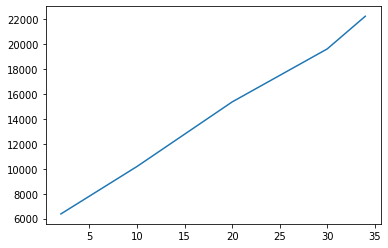

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

x = [2, 10, 20, 30, 34]
y = [6380, 10185, 15360, 19613, 22233]

sns.lineplot(x, y)
plt.show()

In [215]:
def predict_time(x,y, x_pred):
    # x_pred = [0, 2,10,20, 30, 40,50,60, 66]
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x_real = np.array(x).reshape((-1, 1))
    y_real = np.array(y)
    model = LinearRegression()
    model.fit(x_real, y_real)

    r_sq = model.score(x_real, y_real)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    x_pred_r = np.array(x_pred).reshape((-1, 1))

    y_pred = model.predict(x_pred_r)

    y_pred = [round(x) for x in y_pred]

    print('predicted response:', y_pred, sep='\n')

    return y_pred


In [216]:
x_pred = [0, 2,10,20, 30, 40,50,60, 66]
y_pred = predict_time(x,y, x_pred)

coefficient of determination: 0.9983134242654341
intercept: 5386.732142857143
slope: [487.88895089]
predicted response:
[5387, 6363, 10266, 15145, 20023, 24902, 29781, 34660, 37587]


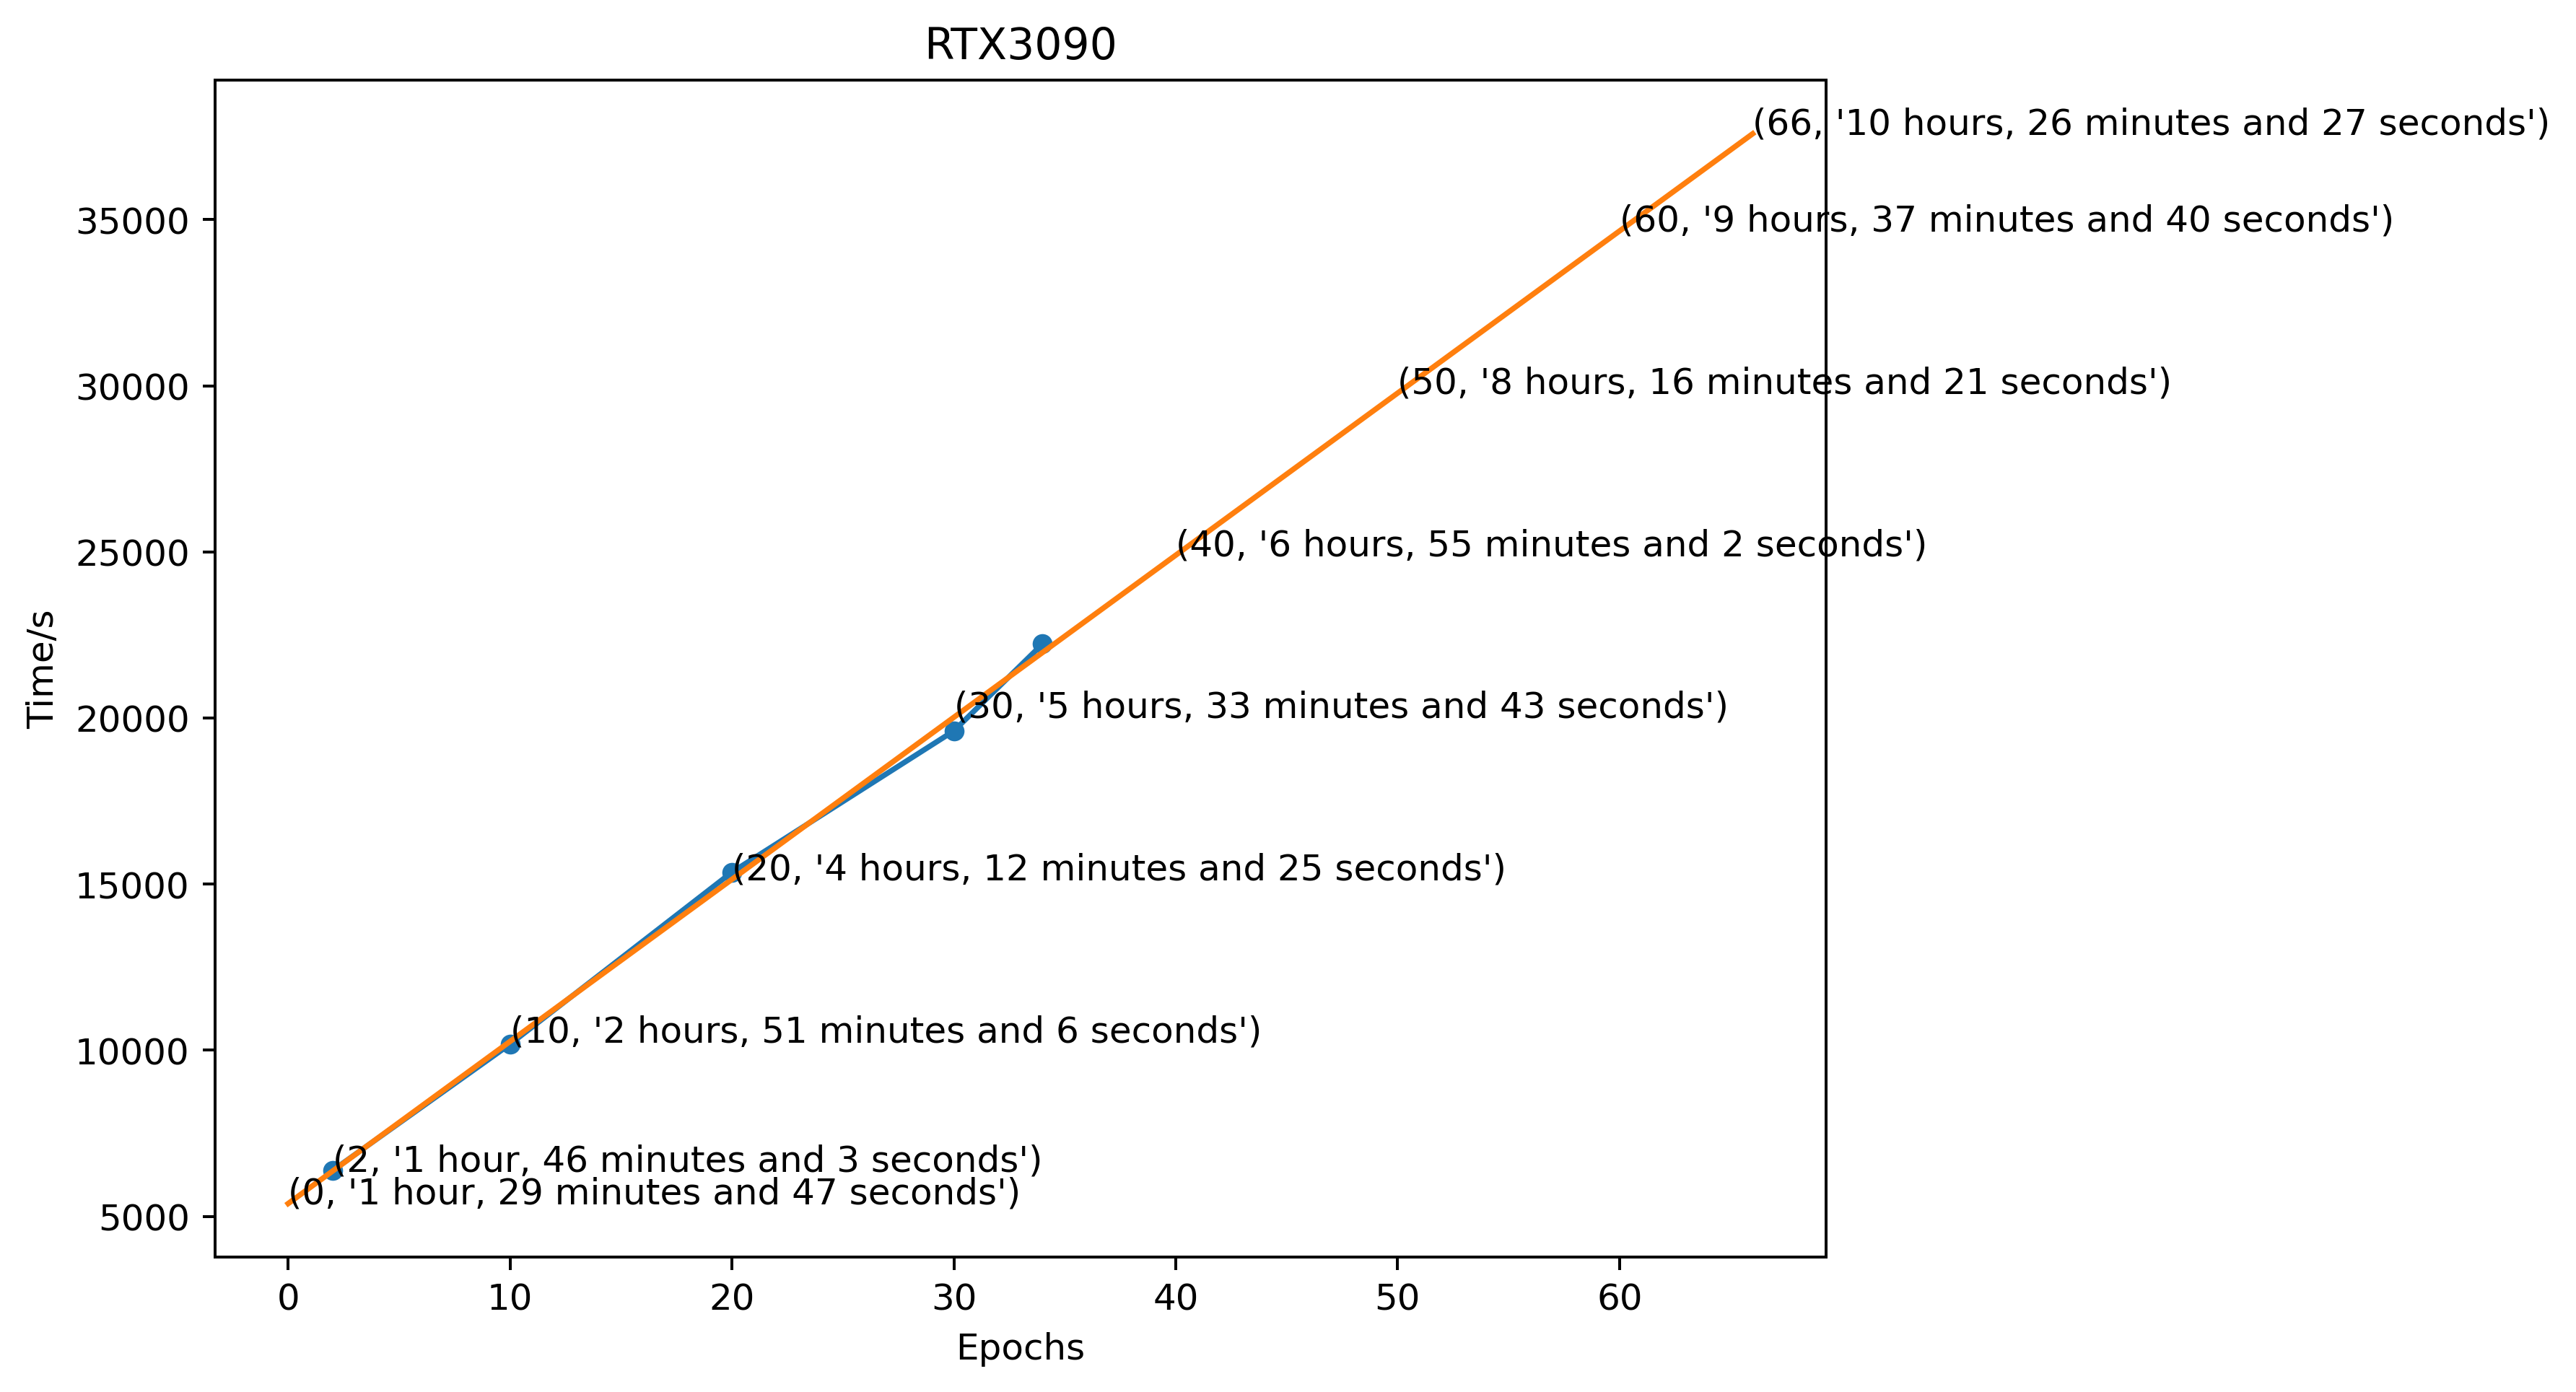

In [217]:
from matplotlib.pyplot import figure
import humanize
figure(figsize=(8, 6), dpi=360)

import matplotlib.pyplot as plt
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x_pred, y=y_pred)
plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("RTX3090")
for i in range(len(x_pred)):
    value = humanize.precisedelta(y_pred[i])
    plt.annotate(f"{x_pred[i], value}", (x_pred[i], y_pred[i]))

plt.axvline(33, min(y), max(y))
plt.show()

x_rtx3090 = x
y_rtx3090 = y

In [218]:
import pandas as pd
import io

In [219]:
epoch2 = \
"""
| Timer                        | Status  | K80(r)    | V100(r)    | A100(r)  | RTX3090(G) | RTX3080(R) | T1(?)   | V100(L) |
| total                        |  ok     |  28343.3  |   20295    |  17574.8 |   6589.41  |    8348.49 | 17580.4 | 19697.1 |
| legal sampling location      |  ok     |   1779.63 |   1546.38  |  1226.95 |   457.886  |    532.535 | 1228.35 | 1229.91 |
| RunTFTCustomVersion tft only |  ok     |     0.001 |     0.001  |    0.001 |       0    |        0   | 0.001   | 0.001   |
| RunTFTCustomVersion init     |  ok     |     5.327 |     5.624  |    8.078 |      0.84  |     3.612  | 4.163   | 3.548   |
| RunTFTCustomVersion train    |  ok     |   6967.26 |    1671.35 |  1373.01 |   1103.15  |    2068.9  | 1342.07 | 1608.61 |
| RunTFTCustomVersion bestfit  |  ok     |   17037.6 |    14795.1 |  13022.1 |   4420.31  |    4997.13 | 13018.4 | 14303.7 |
| label2                       |  ok     |     0.002 |      0.002 |    0.002 |      0.001 |      0.001 | 0.002   | 0.002   |
| label3                       |  ok     |     0.108 |     0.096  |    0.099 |     0.033  |      0.036 | 0.1     | 0.01    |
""".strip().replace("\n", ";")
epoch2 = " ".join(epoch2.split()).replace(";", "\n")
print (epoch2)
df = pd.read_table(io.StringIO(epoch2),delimiter='|')

df.drop(df.columns[[0]], axis = 1, inplace = True)  # drop unnamed column
df.drop(df.columns[[1]], axis = 1, inplace = True)  # drop Status
df = df.iloc[: , :-1] # drop Last column
df

| Timer | Status | K80(r) | V100(r) | A100(r) | RTX3090(G) | RTX3080(R) | T1(?) | V100(L) |
| total | ok | 28343.3 | 20295 | 17574.8 | 6589.41 | 8348.49 | 17580.4 | 19697.1 |
| legal sampling location | ok | 1779.63 | 1546.38 | 1226.95 | 457.886 | 532.535 | 1228.35 | 1229.91 |
| RunTFTCustomVersion tft only | ok | 0.001 | 0.001 | 0.001 | 0 | 0 | 0.001 | 0.001 |
| RunTFTCustomVersion init | ok | 5.327 | 5.624 | 8.078 | 0.84 | 3.612 | 4.163 | 3.548 |
| RunTFTCustomVersion train | ok | 6967.26 | 1671.35 | 1373.01 | 1103.15 | 2068.9 | 1342.07 | 1608.61 |
| RunTFTCustomVersion bestfit | ok | 17037.6 | 14795.1 | 13022.1 | 4420.31 | 4997.13 | 13018.4 | 14303.7 |
| label2 | ok | 0.002 | 0.002 | 0.002 | 0.001 | 0.001 | 0.002 | 0.002 |
| label3 | ok | 0.108 | 0.096 | 0.099 | 0.033 | 0.036 | 0.1 | 0.01 |


,Timer,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),T1(?),V100(L)
0,total,28343.300,20295.000,17574.800,6589.410,8348.490,17580.400,19697.100
1,legal sampling location,1779.630,1546.380,1226.950,457.886,532.535,1228.350,1229.910
2,RunTFTCustomVersion tft only,0.001,0.001,0.001,0.000,0.000,0.001,0.001
3,RunTFTCustomVersion init,5.327,5.624,8.078,0.840,3.612,4.163,3.548
4,RunTFTCustomVersion train,6967.260,1671.350,1373.010,1103.150,2068.900,1342.070,1608.610
5,RunTFTCustomVersion bestfit,17037.600,14795.100,13022.100,4420.310,4997.130,13018.400,14303.700
6,label2,0.002,0.002,0.002,0.001,0.001,0.002,0.002
7,label3,0.108,0.096,0.099,0.033,0.036,0.100,0.010


In [220]:
def read_cm_csv_benchmark(content, deliminter=",", label=None):
    _content = content.strip().replace("# csv,", "")
    df = pd.read_table(io.StringIO(_content),delimiter=',')
    df.drop(df.columns[[1]], axis = 1, inplace = True)  # drop Status
    if label:
        df.columns.values[1] = label
    return df

In [221]:

# dont know what this is
thomas_1 = read_cm_csv_benchmark("""
# csv,timer,status,time
# csv,total,ok,17580.414
# csv,data head setup,failed,None
# csv,legal sampling location,ok,1228.345
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,failed,None
# csv,RunTFTCustomVersion init,ok,4.163
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1342.073
# csv,RunTFTCustomVersion bestfit,ok,13018.363
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
# csv,RunTFTCustomVersion stop,failed,None
""", label="thomas_1")
thomas_1


,timer,thomas_1
0,total,17580.414
1,data head setup,None
2,legal sampling location,1228.345
3,RunTFTCustomVersion tft only,0.001
4,RunTFTCustomVersion print,None
5,RunTFTCustomVersion init,4.163
6,RunTFTCustomVersion restore,0.0
7,RunTFTCustomVersion analysis,0.0
8,RunTFTCustomVersion train,1342.073
9,RunTFTCustomVersion bestfit,13018.363


In [222]:
# colab P100
colab = {}

colab["40"] = \
"""
# csv,timer,status,time
# csv,total,ok,65791.932
# csv,data head setup,ok,2478.995
# csv,legal sampling location,ok,1229.914
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.735
# csv,RunTFTCustomVersion A,ok,62897.312
# csv,RunTFTCustomVersion init,ok,3.923
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,49880.256
# csv,RunTFTCustomVersion bestfit,ok,13013.03
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.493
# csv,RunTFTCustomVersion bestfit summary,ok,0.072
# csv,RunTFTCustomVersion bestfit network summary,ok,0.381
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.044
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.039
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.121
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.036
# csv,RunTFTCustomVersion bestfit finalize,ok,13010.779
# csv,label1,ok,0.0
# csv,label2,ok,0.003
# csv,label3,ok,0.076
"""

colab["20"] = \
"""
# csv,timer,status,time
# csv,total,ok,35726.344
# csv,data head setup,ok,1697.409
# csv,legal sampling location,ok,849.307
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.528
# csv,RunTFTCustomVersion A,ok,33707.727
# csv,RunTFTCustomVersion init,ok,1.526
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,24543.595
# csv,RunTFTCustomVersion bestfit,ok,9162.509
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.133
# csv,RunTFTCustomVersion bestfit summary,ok,0.064
# csv,RunTFTCustomVersion bestfit network summary,ok,0.299
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.027
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.023
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.078
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.024
# csv,RunTFTCustomVersion bestfit finalize,ok,9160.819
# csv,label1,ok,0.0
# csv,label2,ok,0.001
# csv,label3,ok,0.059
"""

colab["2"] = \
"""
# csv,timer,status,time
# csv,total,ok,13654.088
# csv,data head setup,ok,1642.207
# csv,legal sampling location,ok,823.203
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.566
# csv,RunTFTCustomVersion A,ok,11668.538
# csv,RunTFTCustomVersion init,ok,3.207
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,2538.811
# csv,RunTFTCustomVersion bestfit,ok,9126.446
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.542
# csv,RunTFTCustomVersion bestfit summary,ok,0.059
# csv,RunTFTCustomVersion bestfit network summary,ok,0.275
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.023
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.029
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.078
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.031
# csv,RunTFTCustomVersion bestfit finalize,ok,9124.368
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.062
"""

In [223]:

df = pd.DataFrame()
for key in sorted(colab.keys()):
    print(key)
    entry = read_cm_csv_benchmark(colab[key], label=f"colab_P100_{key}")
    entry.loc[len(entry.index)] = ['epoch', key]
    entry.loc[len(entry.index)] = ['gpu', "P100"]
    df = pd.concat([df,entry], axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.set_index('timer')
df

2
20
40


,colab_P100_2,colab_P100_20,colab_P100_40
timer,,,
total,13654.088,35726.344,65791.932
data head setup,1642.207,1697.409,2478.995
legal sampling location,823.203,849.307,1229.914
RunTFTCustomVersion tft only,0.0,0.0,0.0
RunTFTCustomVersion print,0.566,0.528,0.735
RunTFTCustomVersion A,11668.538,33707.727,62897.312
RunTFTCustomVersion init,3.207,1.526,3.923
RunTFTCustomVersion restore,0.0,0.0,0.0
RunTFTCustomVersion analysis,0.0,0.0,0.0


In [224]:
a = df.loc[['total','epoch'],:].transpose()
a = a.astype({"epoch": int})

In [225]:
print (a["epoch"])
x = a["epoch"].values
y = a["total"].values

print(x)
print(y)

colab_P100_2      2
colab_P100_20    20
colab_P100_40    40
Name: epoch, dtype: int64
[ 2 20 40]
[13654.088 35726.344 65791.932]


coefficient of determination: 0.9966505426442948
intercept: 9985.079623616231
slope: [1374.46976015]
predicted response:
[9985, 12734, 23730, 37474, 51219, 64964, 78709, 92453, 100700]


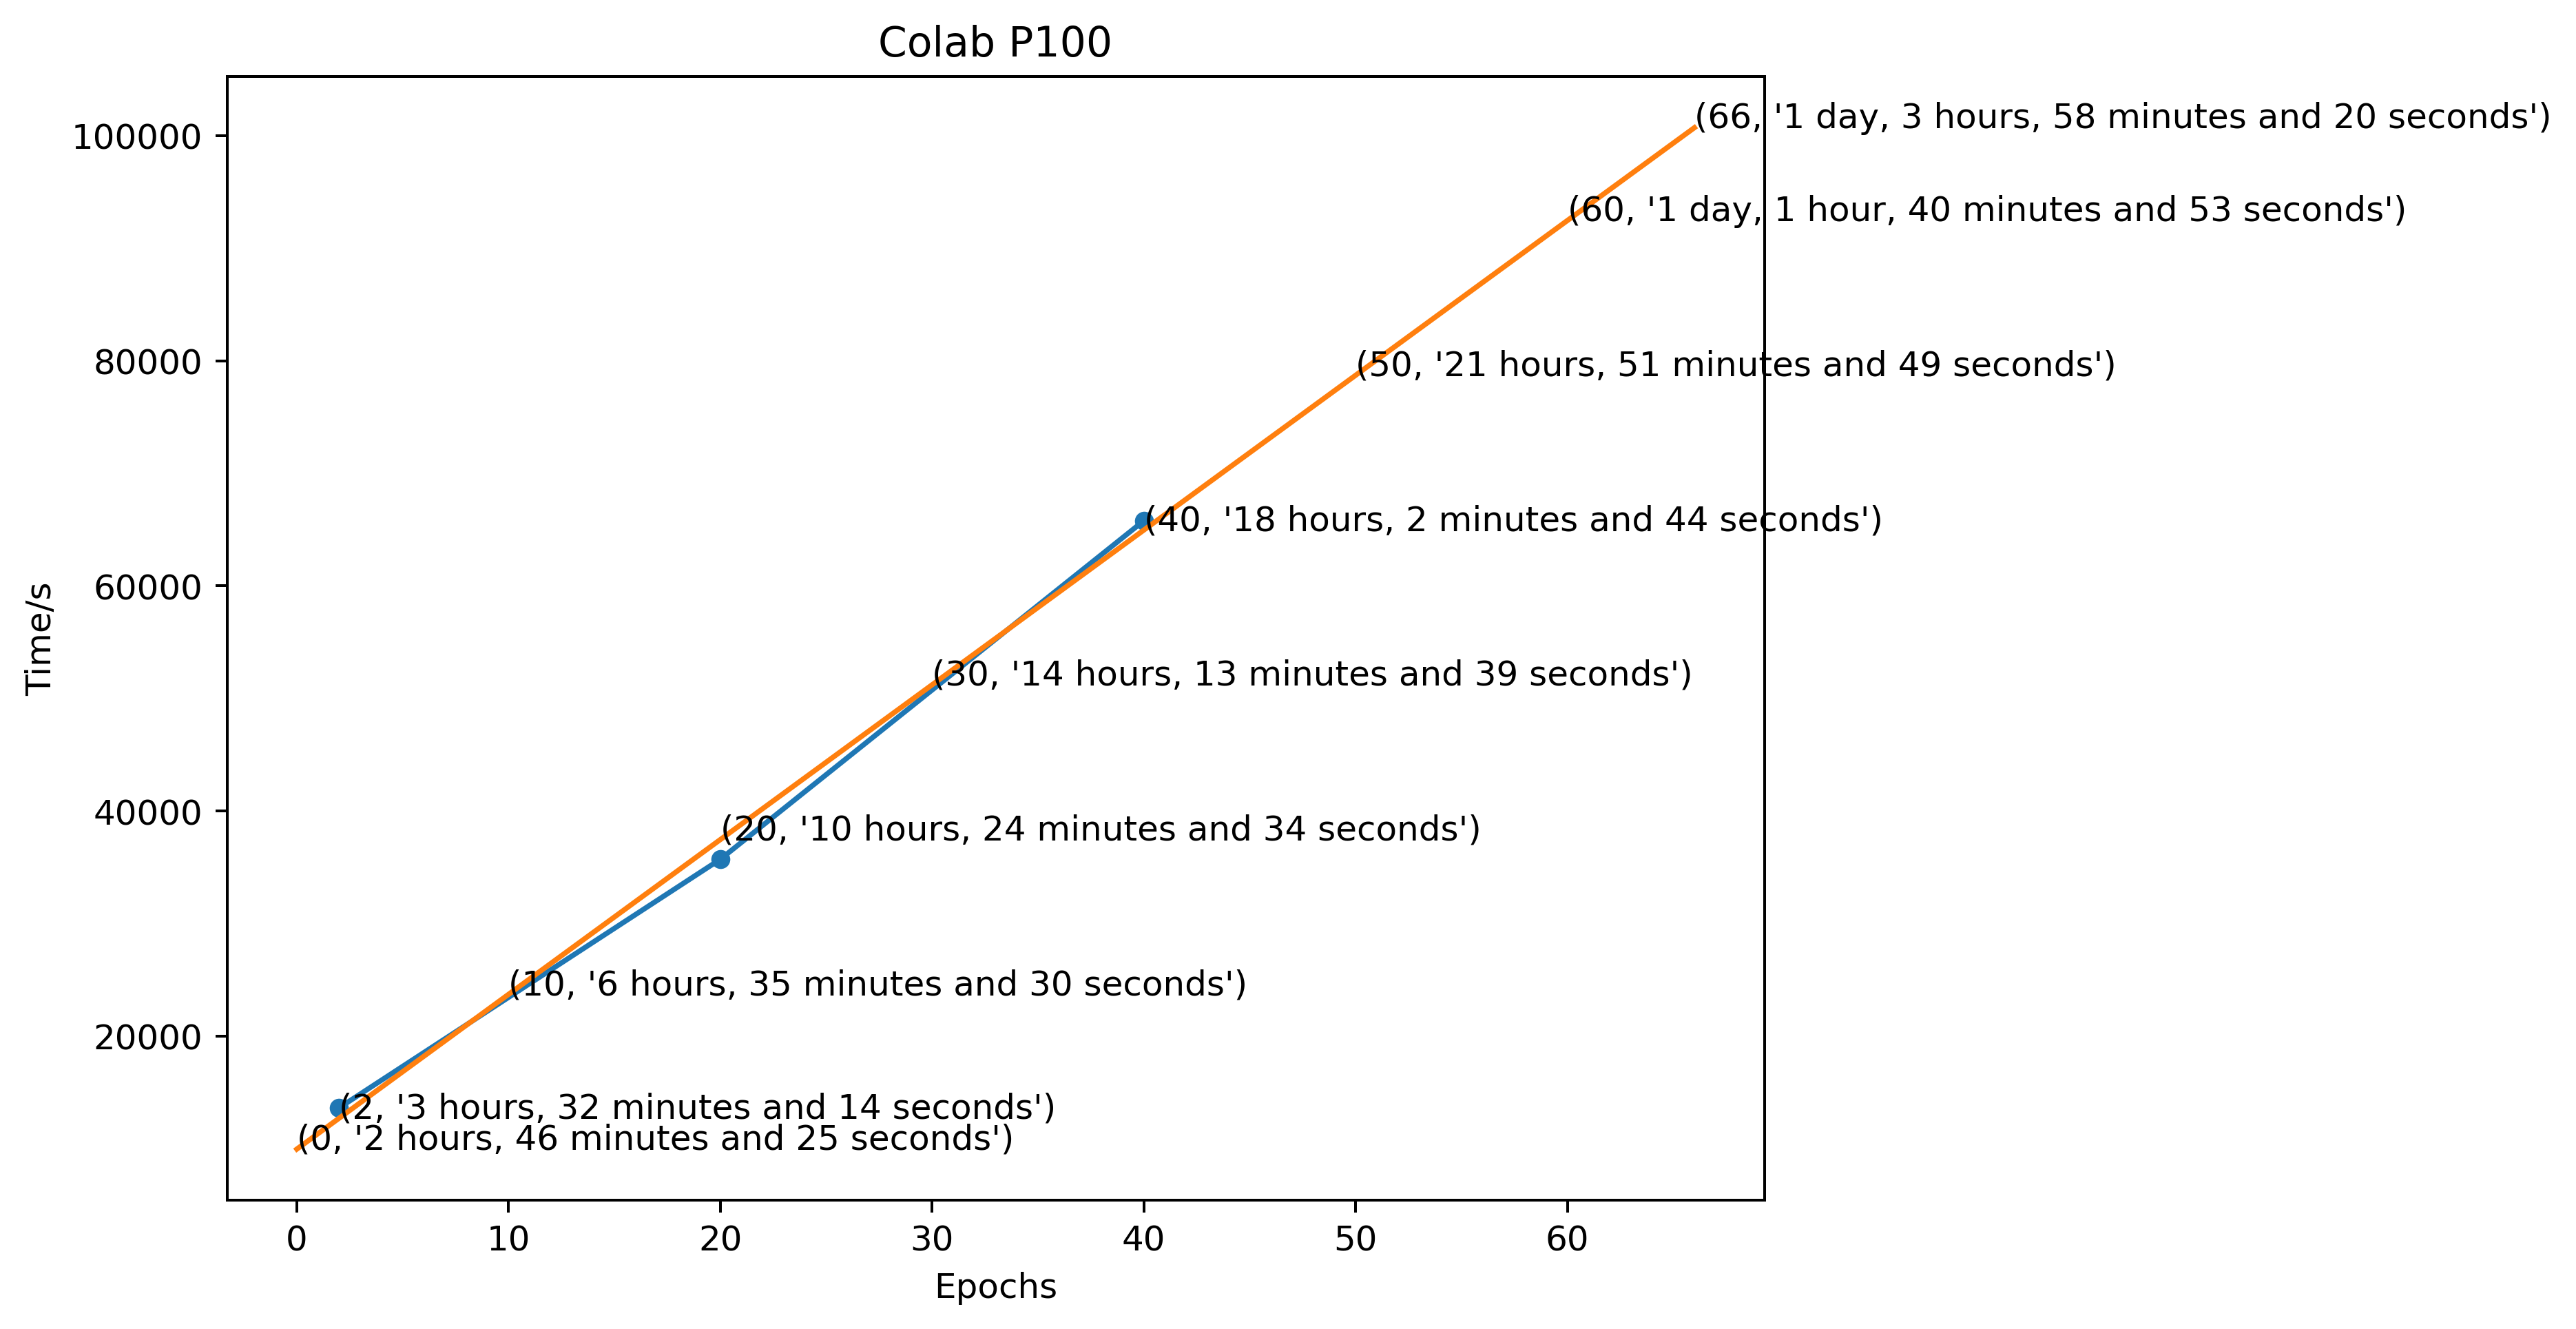

In [226]:
x_pred = [0, 2, 10, 20, 30, 40, 50, 60, 66]
y_pred = predict_time(x, y, x_pred)

figure(figsize=(8, 6), dpi=360)

import matplotlib.pyplot as plt

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x_pred, y=y_pred)
plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("Colab P100")
for i in range(len(x_pred)):
    value = humanize.precisedelta(y_pred[i])
    plt.annotate(f"{x_pred[i], value}", (x_pred[i], y_pred[i]))

plt.axvline(33, min(y), max(y))
plt.show()

x_p100_colab = x
y_p100_colab = y



3h 47m  34s
9h 55m  26s
18h 16m  31s


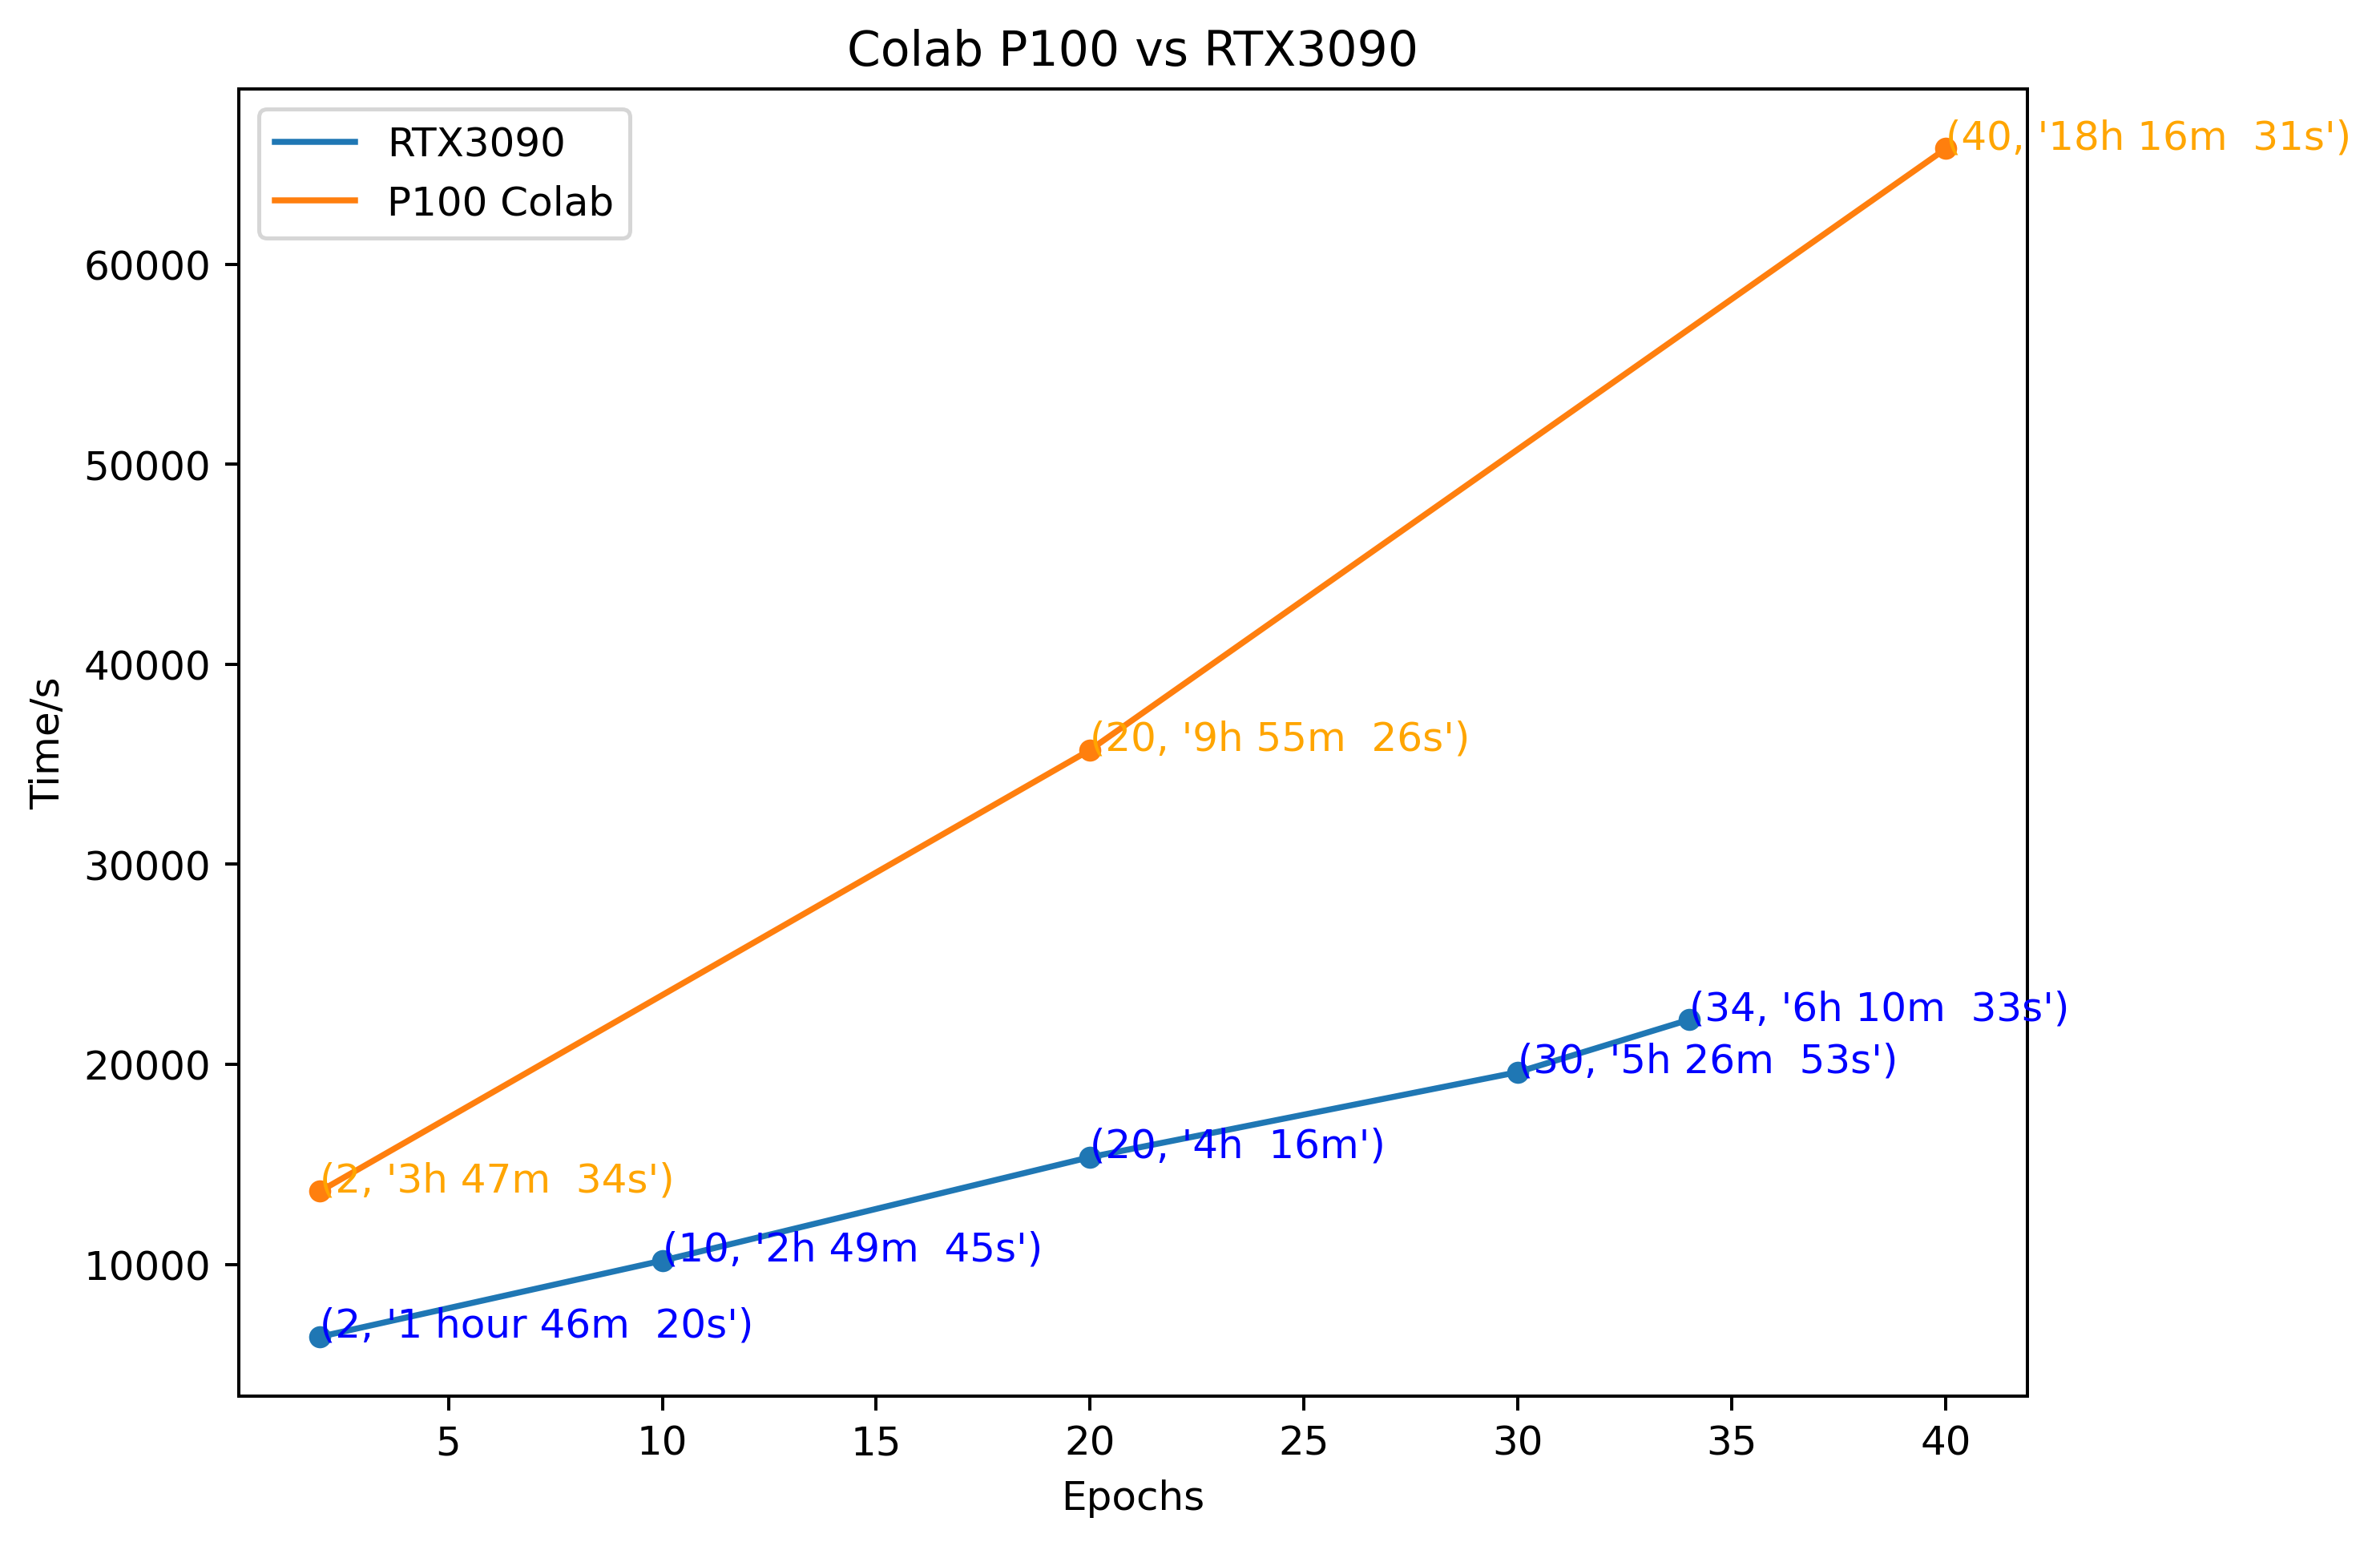

In [254]:
def time_string(content):
    return content.replace(" hours", "h").replace(" minutes", "m").replace(" seconds", "s").replace("days", "d").replace("and", "").replace(",", "")

figure(figsize=(8, 6), dpi=360)


x= x_rtx3090
y = y_rtx3090
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y, label="RTX3090")
for i in range(len(x)):
    value = time_string(humanize.precisedelta(y[i]))
    plt.annotate(f"{x[i], value}", (x[i], y[i]), color="blue")

x=x_p100_colab
y=y_p100_colab
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y, label="P100 Colab")
for i in range(len(x)):
    value = time_string(humanize.precisedelta(y[i]))
    print (value)
    plt.annotate(f"{x[i], value}", (x[i], y[i]), color="orange")

plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("Colab P100 vs RTX3090")

#plt.axvline(33, min(y), max(y))
plt.show()
